<a href="https://colab.research.google.com/github/ChintzRuparel/Computer-Vision/blob/main/Experiment6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Computer Vision EXP 6
   **Chintan Ruparel**

  **C086**

  **C1**

  Aim : To apply warping on given image using transformation matrix.

In [11]:
#For mathematical caculations.
import numpy as np

#To plot the image.
import matplotlib.pyplot as plt

#Computer vision version 2.
import cv2

#Read image
from skimage.io import imread

Text(0.5, 1.0, 'Image 2 - Book 1')

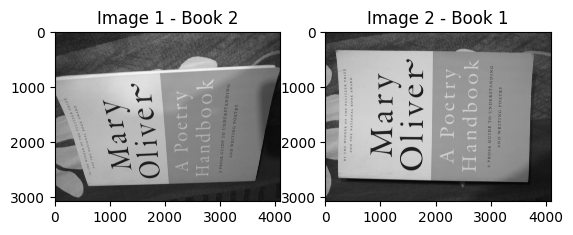

In [12]:
# Steps
# Determine feature descriptor using ORP - key points of image 1 and 2
# Match both the image keypoints
# Know the relation of the key points after matching by determining transformation matrix

image1 = cv2.imread('book2.jpg')
image2 = cv2.imread('book1.jpg')

image1_g = cv2.cvtColor(image1,cv2.COLOR_BGR2GRAY)
image2_g = cv2.cvtColor(image2,cv2.COLOR_BGR2GRAY)

plt.subplot(1,2,1)
plt.imshow(image1_g, cmap='gray')
plt.title("Image 1 - Book 2")

plt.subplot(1,2,2)
plt.imshow(image2_g, cmap='gray')
plt.title("Image 2 - Book 1")


In [13]:
#Applying ORB to determine descriptors
height,width = image2_g.shape
orb_detector  =cv2.ORB_create(5000)

#Keypoints and corresponding descriptors
k1,d1 = orb_detector.detectAndCompute(image1_g,None)
k2,d2 = orb_detector.detectAndCompute(image2_g,None)

#Matching by determining minimum distance between keypoints , 1st keypoint of image 1 with 1st key point of image 2
matcher  =cv2.BFMatcher(cv2.NORM_HAMMING,crossCheck=True)

#Applying the matcher
matches= matcher.match(d1,d2)
no_matches = len(matches)

print(no_matches)

1351


In [14]:
#Populate all zero matrices with
#1st matrix have all key point
#2nd matrix will have all corresponding the keypoint which is matched
point1 = np.zeros((no_matches,2))
point2 = np.zeros((no_matches,2))


for i in range(no_matches):
  point1[i,:]= k1[matches[i].queryIdx].pt
  point2[i,:]= k2[matches[i].trainIdx].pt

In [15]:
#define and determine transformation matrix
h,mask = cv2.findHomography(point1,point2,cv2.RANSAC)

#aaply h matrix on original image so that it can be transformed to look like the 2nd image
transformed_img = cv2.warpPerspective(image1,h,(width,height))


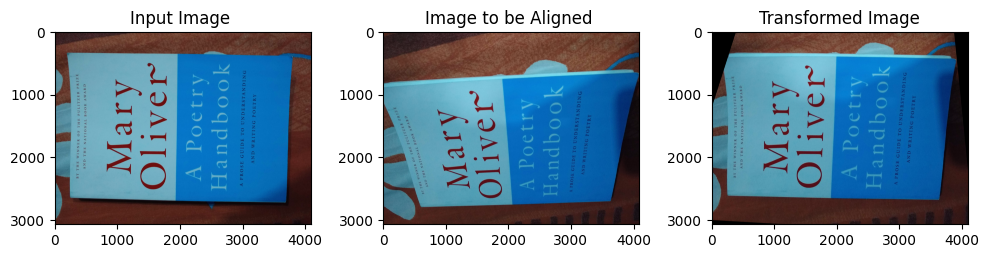

In [17]:
plt.figure(figsize = (10,10))
plt.subplot(1,3,1)
plt.imshow(image2)
plt.title("Input Image ")

plt.subplot(1,3,2)
plt.imshow(image1)
plt.title("Image to be Aligned ")

plt.subplot(1,3,3)
plt.imshow(transformed_img)
plt.title("Transformed Image")
plt.tight_layout()

#Conclusion :
1. Input image and the image to be aligned are compared using ORB Feature Desciptors and Brute Force Matcher.
2. Transformation Matrix genrated for the matched keypoints. This matrix shows the relation between two images which could be orientation, scaling or shift.
3. Transformation can be used to generate warp matrix which can be used to undo the effect of scaling, shift and rotation.
4. Final warp image is the transformed image.